# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

In this Kernel we will be covering following things 

1.Data Preprocessing 

2.Data Vizualizaion 

3.Feature Engineering 

4.Predicting Heart Disease 

This is a work in process.I will be updating the kernel in the coming days.If you like my work please do vote for me.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))


# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
import warnings
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# 1.Importing and Data Exploration data

In [3]:
data=pd.read_csv('../input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


****Data contains following information

* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: The number of major vessels (0-3)
* thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* target: Heart disease (0 = no, 1 = yes)

### Shape of Data

In [4]:
data.shape

(303, 14)

So our data has 303 rows and 14 features

### Missing Values

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We are very lucky here there are no Null Values in the dataset.But in this data the missing values are present in the form of value ZERO. Our next task would be to find out numbers of ZEROS in each column.

### Finding out Zero's

In [6]:
cols = data.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
print("# Rows in the dataset {0}".format(len(data)))
print("---------------------------------------------------")
for col in cols:
    print("# Rows in {1} with ZERO value: {0}".format(len(data.loc[data[col] ==0]),col))

# Rows in the dataset 303
---------------------------------------------------
# Rows in age with ZERO value: 0
# Rows in sex with ZERO value: 96
# Rows in cp with ZERO value: 143
# Rows in trestbps with ZERO value: 0
# Rows in chol with ZERO value: 0
# Rows in fbs with ZERO value: 258
# Rows in restecg with ZERO value: 147
# Rows in thalach with ZERO value: 0
# Rows in exang with ZERO value: 204
# Rows in oldpeak with ZERO value: 99
# Rows in slope with ZERO value: 21
# Rows in ca with ZERO value: 175
# Rows in thal with ZERO value: 2
# Rows in target with ZERO value: 138


The columns which have categorical values can have ZERO values.But columns like cp,trestbps,chol,fbs,exang,oldpean and Slope should not have value ZERO.The presence of ZERO in this columns indicate the presence of null values.

In [8]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

As all the columns are either integer or float there is no need to convert categorical values numeric values.

# 2.Data Vizualization

The columns which have categorical values can have ZERO values.But columns like cp,trestbps,chol,fbs,exang,oldpean and Slope should not have value ZERO.The presence of ZERO in this columns indicate the presence of null values.

### Summary of Dataset

In [9]:
print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])
print('\nFeatures :\n     :',data.columns.tolist())
print('\nMissing values    :',data.isnull().values.sum())
print('\nUnique values :  \n',data.nunique())

Rows     : 303
Columns  : 14

Features :
     : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Missing values    : 0

Unique values :  
 age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


### Describing the DataSet

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


1.From the above Stats we can conclude that the Mean age of patients in datset is 54.3 years

2.There are more men in the Dataset 68%

3.Mean Resting Blood Pressure value is 132 mm of Hg with a min of 94mm and maximum of 200mm

4.Mean Cholesterol level is 246 mg/dl with a mainimum value of 126 mg/dl and maximum value of 564 mg/dl

### Histogram

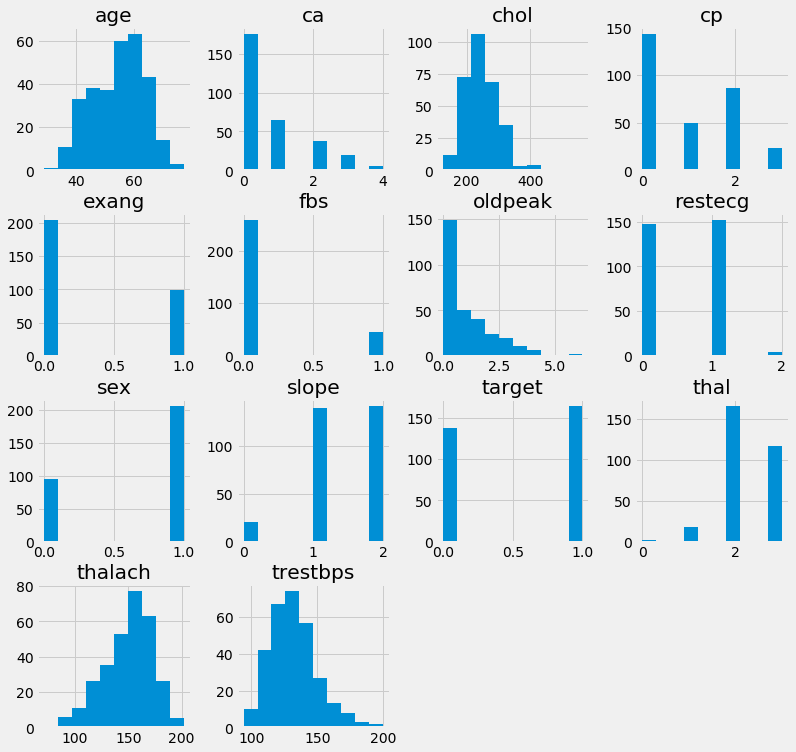

In [11]:
data.hist(figsize = (12,12))
plt.show()

We can see that 

1.Age,cholestrol,max heart rate,resting blood pressure and st_depression are numerical variables.

2.Chest pain type,exercie induced angina,fasting blood sugar,number major vessels,rest ecg,sex,st slope,target and thalassemia are categorical variables.



### Heart Disease Distribution in Dataset

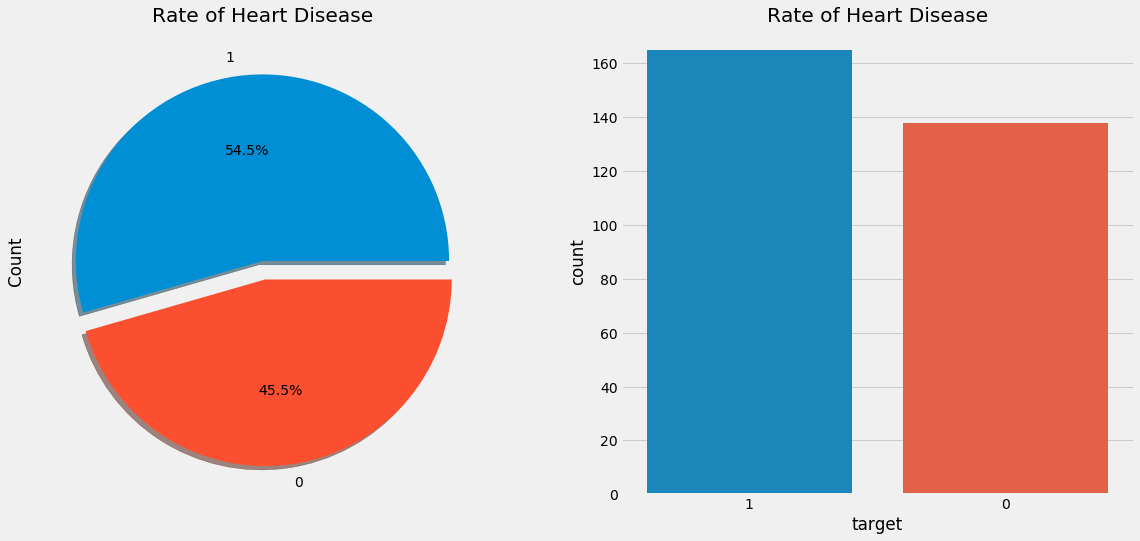

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Rate of Heart Disease')
ax[0].set_ylabel('Count')
sns.countplot('target',data=data,ax=ax[1],order=data['sex'].value_counts().index)
ax[1].set_title('Rate of Heart Disease')
plt.show()

Data Set has 54 % cases where the Patient has Heart Disease

### Chest Pain Type

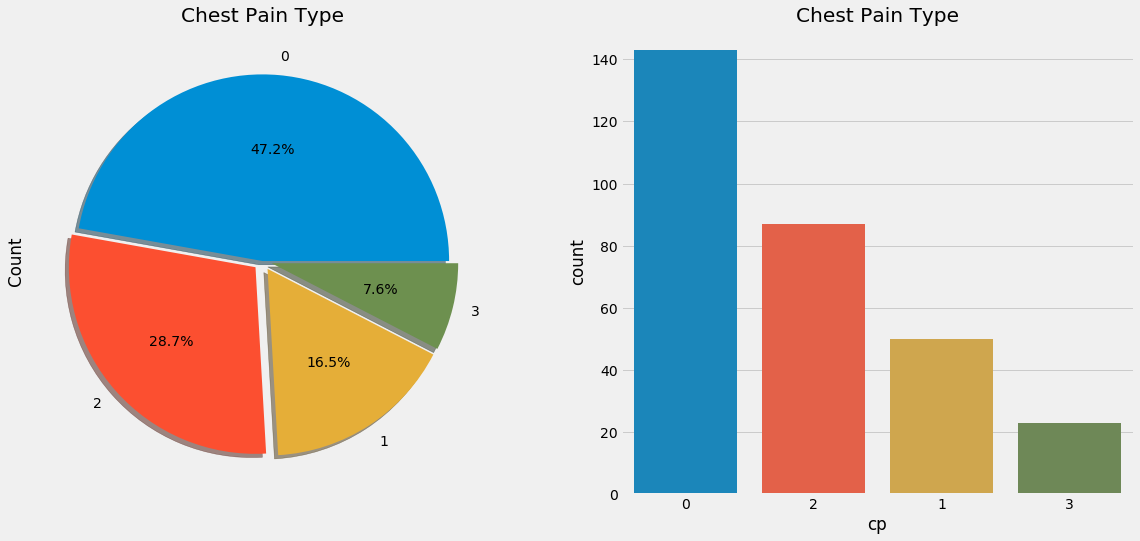

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['cp'].value_counts().plot.pie(explode=[0,0.05,0.05,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Chest Pain Type')
ax[0].set_ylabel('Count')
sns.countplot('cp',data=data,ax=ax[1],order=data['cp'].value_counts().index)
ax[1].set_title('Chest Pain Type')
plt.show()

Value 0: typical angina

Value 1: atypical angina

Value 2: non-anginal pain

Value 3: asymptomatic

### Heart Disease Based on Sex

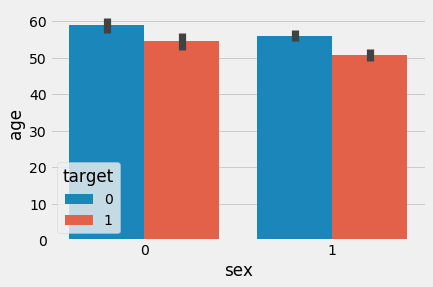

In [14]:
sns.barplot(x="sex",y ='age',hue ='target',data=data)
pass

We can see that more men have heart issues than women.Men dont show emotions keep everything in their heart and finally suffer with heart diease.Hormones also play a big role in all this.

### Cat + Chest Pain + Target + Point + Sex Column Plot

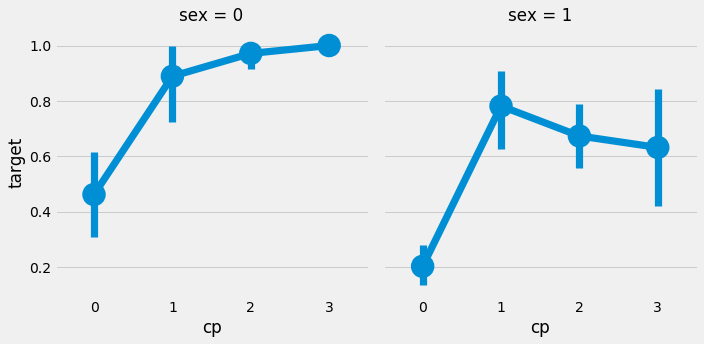

In [15]:
sns.catplot(x='cp',y='target',kind='point',data=data,col='sex')
pass

We can see that women with chest pain type 3 have more chance of heart disease.Men with chest pain type 1 have more chance of heart disease.

### Distribution of Parameters

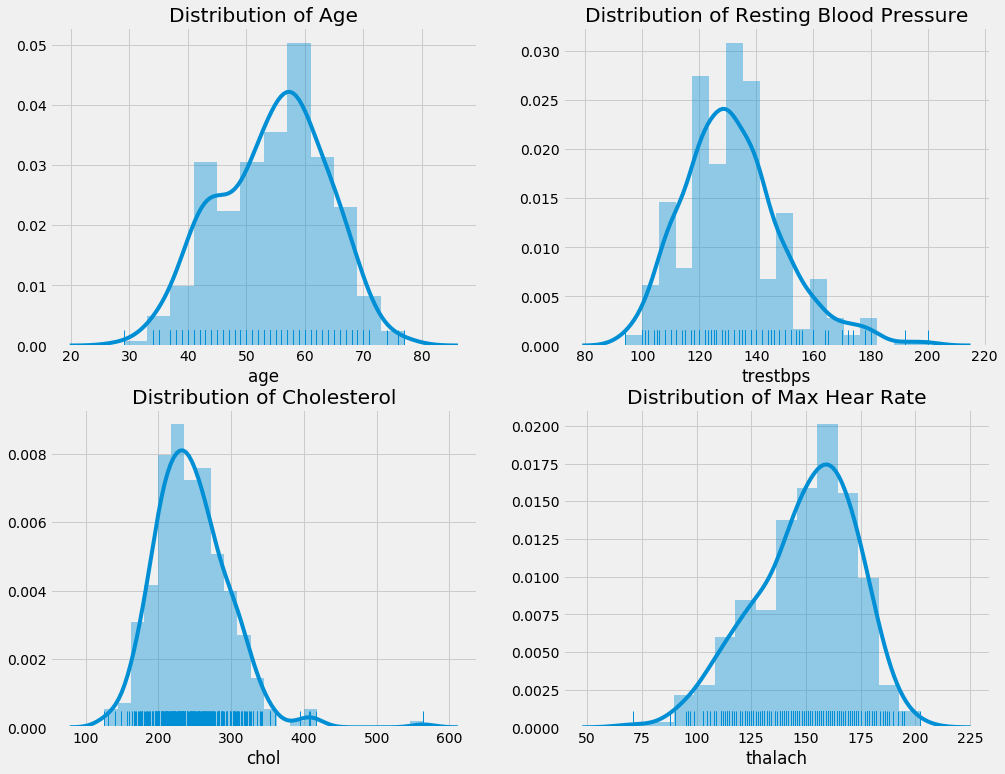

In [16]:
#Creating subplots
plt.figure(figsize=(15, 12))
#Subplot1 
plt.subplot(2,2,1)
plt.title('Distribution of Age')
sns.distplot(data['age'], rug = True)

#Subplot2
plt.subplot(2,2,2)
plt.title('Distribution of Resting Blood Pressure')
sns.distplot(data['trestbps'], rug = True)

#Subplot3
plt.subplot(2,2,3)
plt.title('Distribution of Cholesterol')
sns.distplot(data['chol'], rug = True)


#Subplot4
plt.subplot(2,2,4)
plt.title('Distribution of Max Hear Rate')
sns.distplot(data['thalach'], rug = True)
plt.ioff()
#plt.show()

Above plots show the distribution of all the key parameters resbonsible for heart health.This are all close to Gaussian Distribution.

### Vilon Plots 

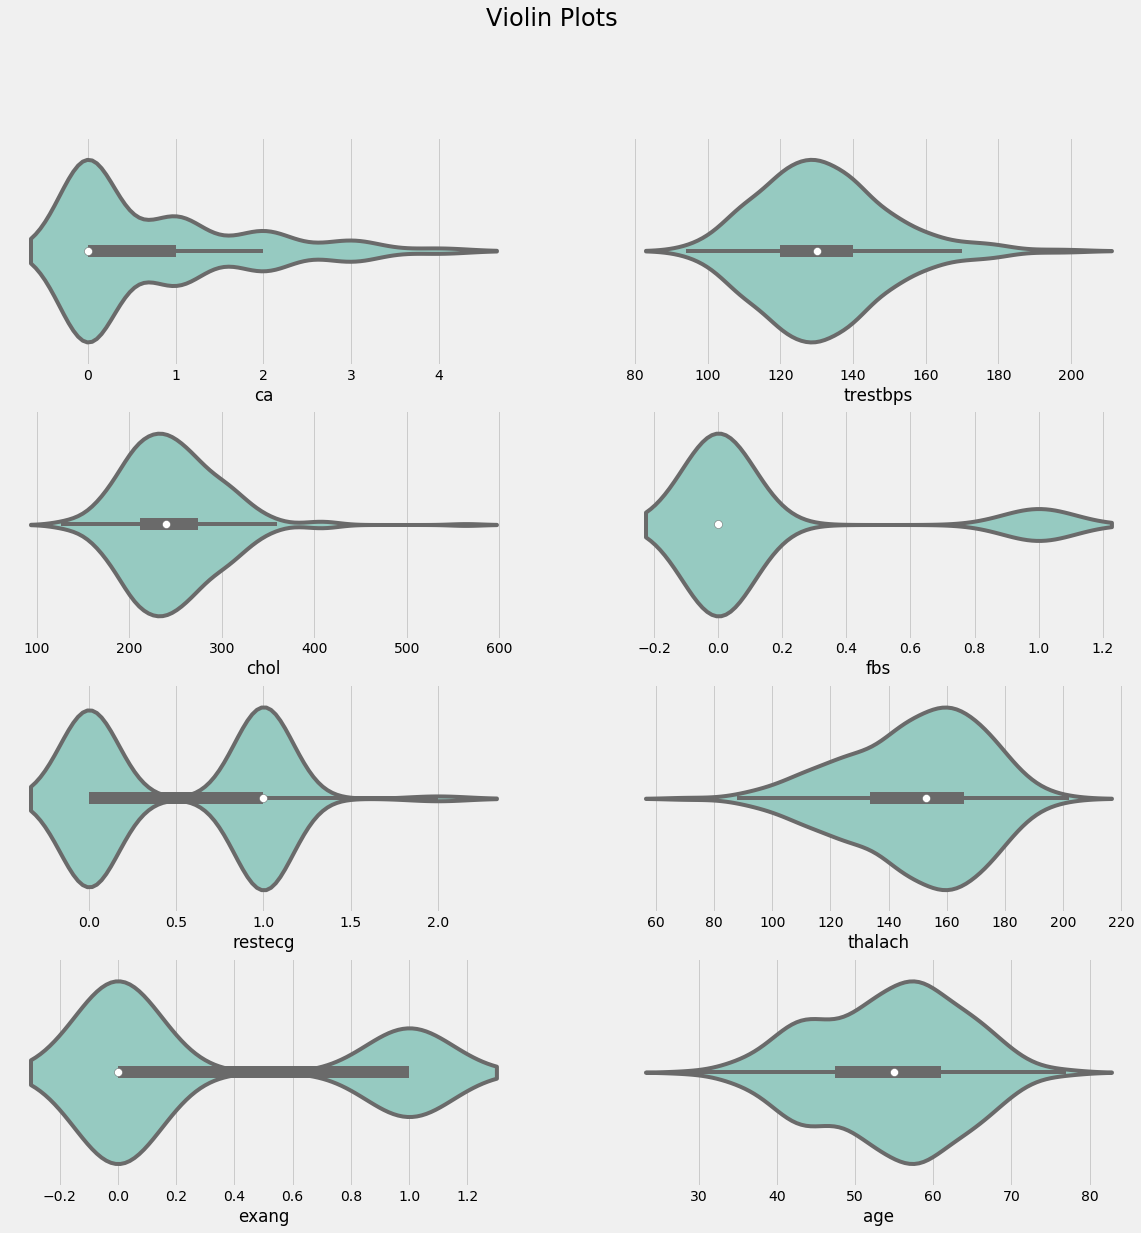

In [17]:
fig,ax = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="ca", data=data,ax=ax[0,0],palette='Set3')
sns.violinplot(x="trestbps", data=data,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='chol', data=data, ax=ax[1,0], palette='Set3')
sns.violinplot(x='fbs', data=data, ax=ax[1,1],palette='Set3')
sns.violinplot(x='restecg', data=data, ax=ax[2,0], palette='Set3')
sns.violinplot(x='thalach', data=data, ax=ax[2,1],palette='Set3')
sns.violinplot(x='exang', data=data, ax=ax[3,0],palette='Set3')
sns.violinplot(x='age', data=data, ax=ax[3,1],palette='Set3')
plt.show()

Above Violin Plots show the range of Critcal Medical Parameters for Patients.Few of the observations are

1.Most people are in the category zero typical angina 

2.Resting blood pressure for most people is around 130 bpm

3.Maximum heart rate is around 160 bpm.

### Vilon Plots Based on Sex

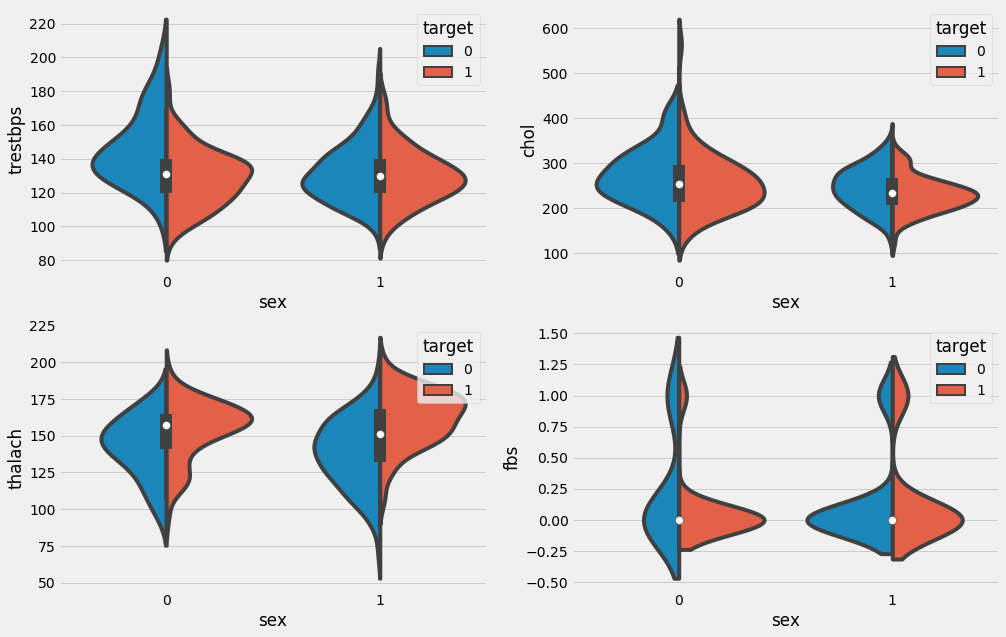

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot("sex","trestbps",hue="target", data=data,split=True)
plt.subplot(2,2,2)
sns.violinplot("sex","chol",hue="target", data=data,split=True)
plt.subplot(2,2,3)
sns.violinplot("sex","thalach",hue="target", data=data,split=True)
plt.subplot(2,2,4)
sns.violinplot("sex","fbs",hue="target", data=data,split=True)
#ax[0].set_title('Sex and trestbps vs target')
#ax[0].set_yticks(range(0,110,10))
#sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
#ax[1].set_title('Sex and Age vs Survived')
#ax[1].set_yticks(range(0,110,10))
plt.ioff()
plt.show()

From the above Violin Plots we can see that resting blood pressure,cholesterol and maximum heart rate have an effect on the cause of heart Disease.In fact all this parameters are directly correlated.Surprisingly people with higher fasting sugar levels dont seem to be affected with heart disease.

### What Age Heat Dsease Strikes 

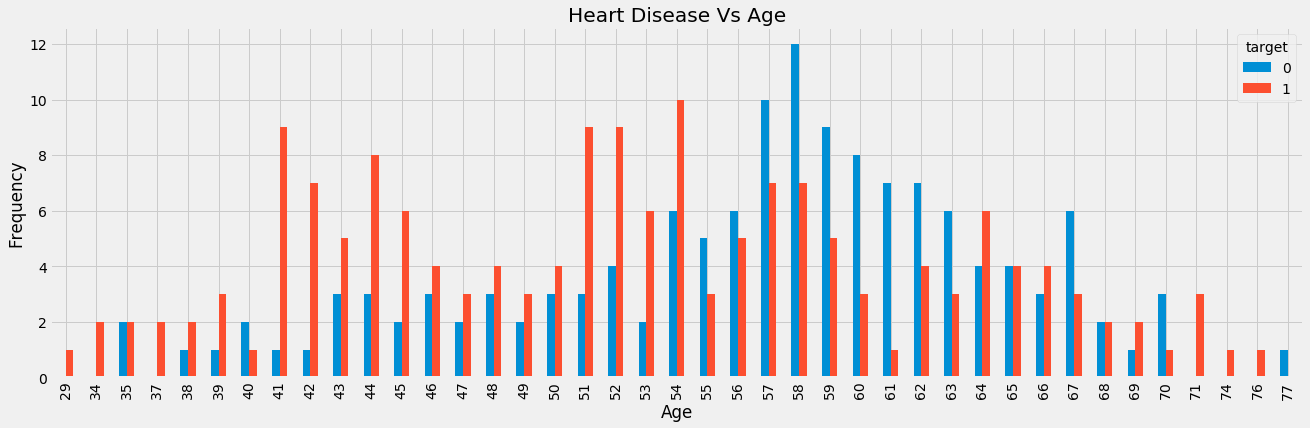

In [19]:
pd.crosstab(data.age,data.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAge.png')
plt.ioff()

We can clearly see that heart disease strikes more in early 40s and early 50s.Nou to get a better picture we can plot the distribution of people with heart disease and their age.

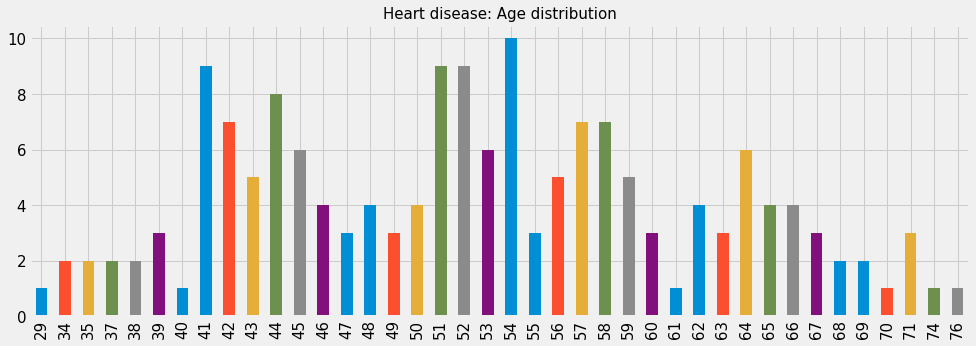

In [20]:
# Bar chart for age with sorted index
# Changing title fontsize -> We have to use alternative matplotlib set_title function
plot = data[data.target == 1].age.value_counts().sort_index().plot(kind = "bar", figsize=(15,5), fontsize = 15)
plot.set_title("Heart disease: Age distribution", fontsize = 15)
plt.ioff()

We can see that heart disease frequency increases once a person is above 40 Years old.Age group of 41-45 and 51-55 have high chance of having heart problem.

### Effect of body parameters on Heart Disease based on Age

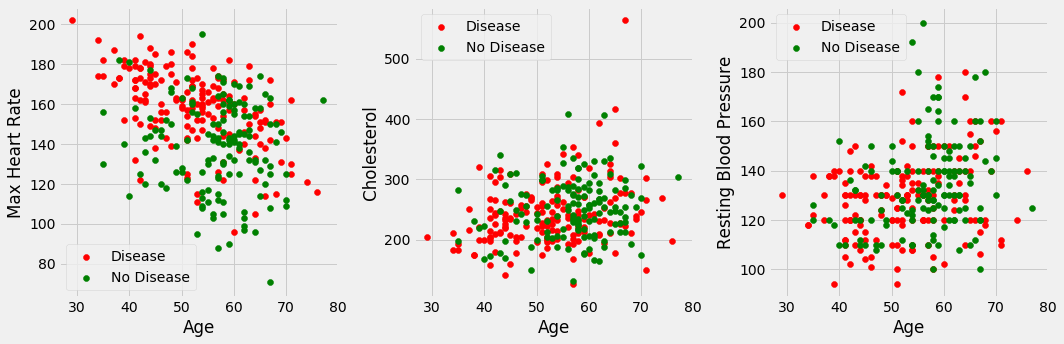

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=data.age[data.target==1],y=data.thalach[data.target==1],c='red')
plt.scatter(x=data.age[data.target==0],y=data.thalach[data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

plt.subplot(1,3,2)
plt.scatter(x=data.age[data.target==1],y=data.chol[data.target==1],c='red')
plt.scatter(x=data.age[data.target==0],y=data.chol[data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

plt.subplot(1,3,3)
plt.scatter(x=data.age[data.target==1],y=data.trestbps[data.target==1],c='red')
plt.scatter(x=data.age[data.target==0],y=data.trestbps[data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

plt.tight_layout()
plt.ioff()

1.We can see that higher heart rate at a younger age can be more dangerous. 

2.Higher cholesterol is dangerous irrespective of age

3.Resting Blood Pressure doesnt have a clear correlation to Heart Disease.

### Correlation Plot 

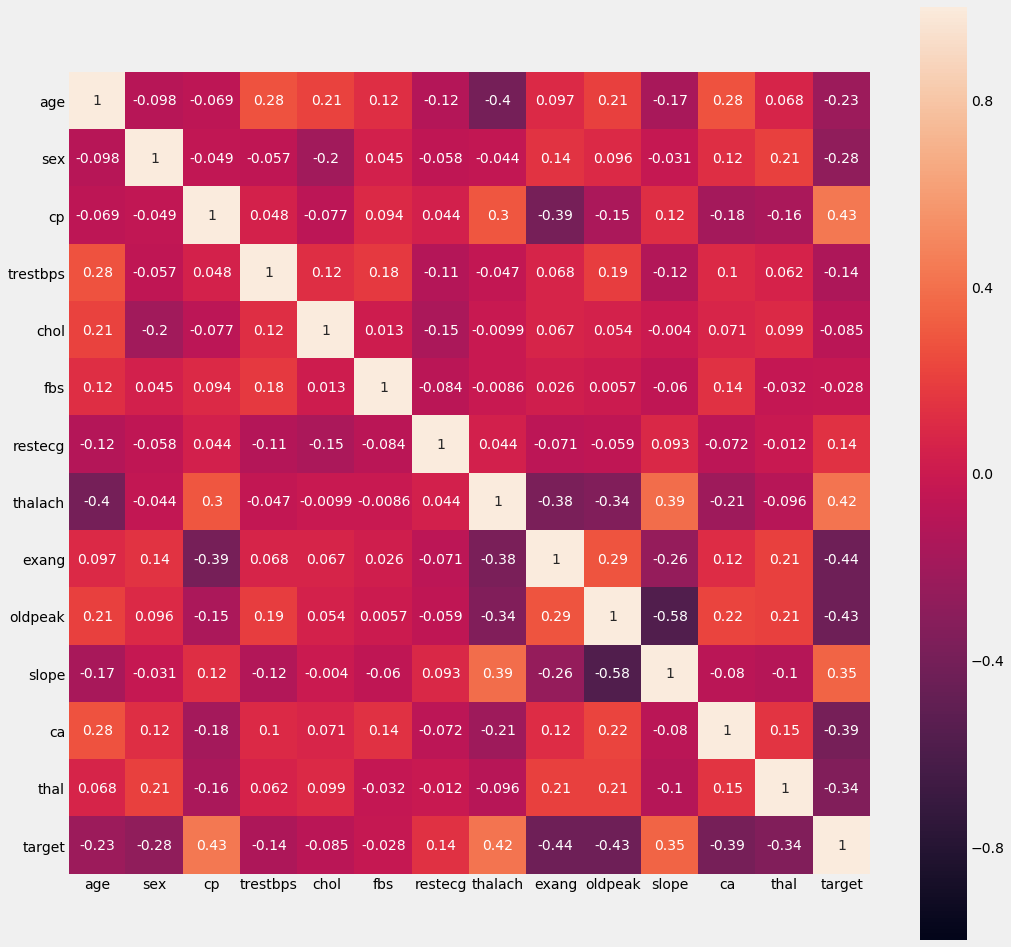

In [22]:
corrmat = data.corr()
fig = plt.figure(figsize = (16,16))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

We can see that there is not much correlation between the features in the dataset.If corelation was high we can face issue of multicollinearity.In that case we would need to use feature engineering to avoid multi colinearity.

# 3.Feature Engineering 

In [23]:
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
final_cols = cols
final_cols = list(final_cols)
final_cols.remove('ca')
final_cols.remove('cp')
final_cols.remove('exang')
final_cols.remove('fbs')
final_cols.remove('restecg')
final_cols.remove('sex')
final_cols.remove('slope')
final_cols.remove('target')
final_cols.remove('thal')
final_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We have dropped the columns with categorical columns.This is because when we do feature engineering we will be repacing the numerical column Zero values with the mean values.This is not needed for the columns with categorical variables.

### Matrix of Features 

In [25]:
X = data.drop('target',axis=1) #predictor feature columns
y = data.target
y.value_counts()

1    165
0    138
Name: target, dtype: int64

We can see that the dataset is unbalanced.First we will balance the dataset.Balancing data set is a good approach to improve the accuracy of the machine learning model.

### Balancing Dataset

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,y)
pd.Series(Y_res_OS).value_counts()

Using TensorFlow backend.


1    165
0    165
dtype: int64

### Converting Numpy Arrays into Dataframe

In [27]:
X_res_OS = pd.DataFrame(X_res_OS,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])
Y_res_OS = pd.DataFrame(Y_res_OS,columns=['target'])

### Test Train Split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_res_OS,Y_res_OS,test_size = 0.1,random_state=10)
print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test labels :',len(y_test))

Training Set : 297
Test Set : 33
Training labels : 297
Test labels : 33


The number of rows of data is very low in the dataset.This may not be sufficient to build a good model.Let us see how our model works out.

### Replacing all the ZEROS with Mean of the Column

In [29]:
final_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [30]:
from sklearn.impute import SimpleImputer 
fill = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill.fit_transform(X_train[final_cols])
X_test = fill.fit_transform(X_test[final_cols])

### Important Features 

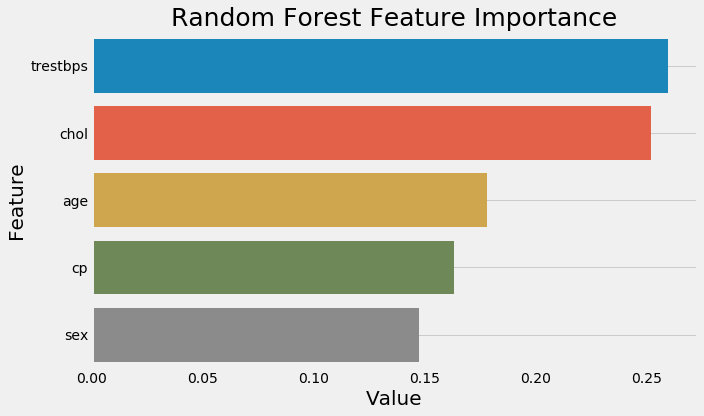

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
columns = ['target']
#admt.drop(columns, inplace=True, axis=1)
#X = admt.drop('target',axis = 1)
#y = admt['target']
#X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = .25,random_state = 123)
rf_model = RandomForestRegressor(n_estimators = 1000,random_state = 123)
rf_model.fit(X_train,y_train)
feature_importance = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns)), columns=['Value','Feature'])
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.xlabel('Value',fontsize=20)
plt.ylabel('Feature',fontsize=20)
plt.title('Random Forest Feature Importance',fontsize=25)
plt.grid()
plt.ioff()
plt.tight_layout()

We can see that resting blood pressure and cholosterol have highest importance while predicting Heart disease. 

# 4.Predicting Heart Disease

### Grid Search

In [32]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    
    grid = GridSearchCV(
         estimator = algorithm,
         param_grid = gridSearchParams,
         cv=cv,scoring='accuracy',verbose=1,n_jobs=-1)
        
    grid_result = grid.fit(X_train,y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test,pred)
    print(pred)
    
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score :'+ str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n',cm)

### Logistic Regression

In [33]:
# Creating Regularization penalty
penalty = ['l1','l2']

# Create regularization hyperparameter space 
C = np.logspace(0,4,10)

# Create hyperparameter options 
hyperparameters = dict(C=C,penalty = penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1]
Best Params : {'C': 1.0, 'penalty': 'l2'}
Classification Report :               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.82      0.70      0.76        20

   micro avg       0.73      0.73      0.73        33
   macro avg       0.72      0.73      0.72        33
weighted avg       0.75      0.73      0.73        33

Accuracy Score :0.7272727272727273
Confusion Matrix : 
 [[10  3]
 [ 6 14]]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.8s finished


### XGBoost

In [34]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
           'learning_rate':np.arange(0.01,0.1,0.01).tolist()
         }
FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 497 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 847 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1297 tasks      | elapsed:  2.3min


[1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]
Best Params : {'learning_rate': 0.060000000000000005, 'max_depth': 2, 'n_estimators': 100}
Classification Report :               precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.83      0.75      0.79        20

   micro avg       0.76      0.76      0.76        33
   macro avg       0.75      0.76      0.75        33
weighted avg       0.77      0.76      0.76        33

Accuracy Score :0.7575757575757576
Confusion Matrix : 
 [[10  3]
 [ 5 15]]


[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  2.4min finished


### Random Forest

In [35]:
param = {
           'n_estimators':[100,500,1000,1500,2000],
           'max_depth':[2,3,4,5,6,7],
        
         }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.2min finished


[1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1]
Best Params : {'max_depth': 4, 'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.62      0.77      0.69        13
           1       0.82      0.70      0.76        20

   micro avg       0.73      0.73      0.73        33
   macro avg       0.72      0.73      0.72        33
weighted avg       0.75      0.73      0.73        33

Accuracy Score :0.7272727272727273
Confusion Matrix : 
 [[10  3]
 [ 6 14]]


### SVC

In [36]:
param = {
           'C':[0.1,1,100,1000],
           'gamma':[0.0001,0.001,0.005,0.1,1,3,5],
           
         }
FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1]
Best Params : {'C': 1000, 'gamma': 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.64      0.69      0.67        13
           1       0.79      0.75      0.77        20

   micro avg       0.73      0.73      0.73        33
   macro avg       0.72      0.72      0.72        33
weighted avg       0.73      0.73      0.73        33

Accuracy Score :0.7272727272727273
Confusion Matrix : 
 [[ 9  4]
 [ 5 15]]


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.6s finished


# Conclusion

1.Most people fall in category 0 ie typical angina for chest pain

2.Resting blood pressure for most people is around 130 bpm.Resting Blood Pressure doesnt have a clear correlation to Heart Disease

3.Surprisingly people with higher fasting sugar levels dont seem to be affected with heart disease

4.We can clearly see that heart disease strikes more in early 40s and early 50s.Age group of 41-45 and 51-55 have high chance of having heart problem.

5.Higher cholesterol is dangerous irrespective of age

6.We can see that higher heart rate at a younger age can be more dangerous.

7.We can see that women with chest pain type 3 have more chance of heart disease.Men with chest pain type 1 have more chance of heart disease.

8.More Men have Heart Issues than Women

9.We are getting the best accuracy in Predicting Heart Disease with XGGoost Algorithm

### TO BE CONTINUED